In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Function To Show the Results

In [2]:
def anomalyScores(original_df, new_df):
    loss = pd.Series(np.sum((np.array(new_df) - np.array(original_df))**2, axis=1))
    anomalyScore = (loss - loss.min())/(loss.max() - loss.min())
    return anomalyScore

In [3]:
def plt_pre(ground_truth, ascore):
    precision, recall, thresholds = precision_recall_curve(ground_truth, ascore)
    plt.plot(np.delete(recall, np.argmax(precision)), np.delete(precision, np.argmax(precision)))
    plt.fill_between(np.delete(recall, np.argmax(precision)), np.delete(precision, np.argmax(precision)), step="pre", alpha=0.4)
    plt.xlabel('Recell')
    plt.ylabel('Precision')
    plt.title(f'Average Precision: {round(average_precision_score(ground_truth, ascore), 2)}')
    plt.show()

    area_under_curve = auc(x=recall, y=precision)
    print(f'Area Under Curve: {round(area_under_curve, 2)}')

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, stratify=y)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
X_train_AE = X_train.copy()
X_test_AE = X_test.copy()

# Two-layer Complete AutoEncoder

In [9]:
# Complete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=29, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dense_1 (Dense)             (None, 29)                870       
                                                                 
Total params: 1,740
Trainable params: 1,740
Non-trainable params: 0
_________________________________________________________________


In [10]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.0838 - accuracy: 0.9024 - val_loss: 2.4059e-04 - val_accuracy: 0.9946
Epoch 2/10
6676/6676 [==============================] - 7s 990us/step - loss: 9.2120e-04 - accuracy: 0.9943 - val_loss: 1.9073e-05 - val_accuracy: 0.9981
Epoch 3/10
6676/6676 [==============================] - 7s 983us/step - loss: 5.8443e-04 - accuracy: 0.9947 - val_loss: 1.1211e-05 - val_accuracy: 0.9980
Epoch 4/10
6676/6676 [==============================] - 7s 975us/step - loss: 5.2523e-04 - accuracy: 0.9939 - val_loss: 5.1563e-04 - val_accuracy: 0.9885
Epoch 5/10
6676/6676 [==============================] - 7s 981us/step - loss: 6.1568e-04 - accuracy: 0.9933 - val_loss: 5.3410e-06 - val_accuracy: 0.9989
Epoch 6/10
6676/6676 [==============================] - 7s 1000us/step - loss: 6.2511e-04 - accuracy: 0.9943 - val_loss: 0.0011 - val_accuracy: 0.9871
Epoch 7/10
6676/6676 [==============================] - 7s 994us/step - loss: 4.9517e

In [11]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)

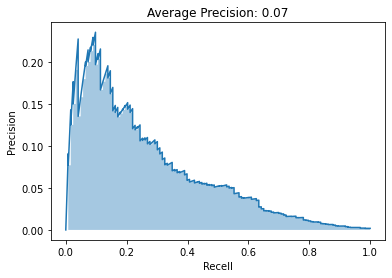

Area Under Curve: 0.07


In [12]:
plt_pre(y_test, anomalyScore)

# Two-layer Undercomplete AutoEncoder

In [13]:
# Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=20, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                600       
                                                                 
 dense_3 (Dense)             (None, 29)                609       
                                                                 
Total params: 1,209
Trainable params: 1,209
Non-trainable params: 0
_________________________________________________________________


In [14]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 6s 930us/step - loss: 0.3312 - accuracy: 0.5898 - val_loss: 0.2760 - val_accuracy: 0.6278
Epoch 2/10
6676/6676 [==============================] - 6s 910us/step - loss: 0.2788 - accuracy: 0.6337 - val_loss: 0.2771 - val_accuracy: 0.6259
Epoch 3/10
6676/6676 [==============================] - 7s 975us/step - loss: 0.2771 - accuracy: 0.6160 - val_loss: 0.2732 - val_accuracy: 0.6110
Epoch 4/10
6676/6676 [==============================] - 6s 973us/step - loss: 0.2760 - accuracy: 0.6094 - val_loss: 0.2728 - val_accuracy: 0.6004
Epoch 5/10
6676/6676 [==============================] - 6s 971us/step - loss: 0.2750 - accuracy: 0.5933 - val_loss: 0.2729 - val_accuracy: 0.5983
Epoch 6/10
6676/6676 [==============================] - 7s 978us/step - loss: 0.2753 - accuracy: 0.5994 - val_loss: 0.2727 - val_accuracy: 0.5940
Epoch 7/10
6676/6676 [==============================] - 7s 975us/step - loss: 0.2753 - accuracy: 0.5985 - val_loss: 0.2726 -

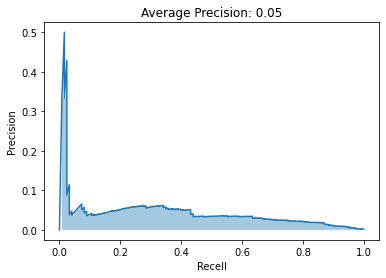

Area Under Curve: 0.04


In [15]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Two-layer Overcomplete AutoEncoder

In [16]:
# Overcomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                1200      
                                                                 
 dense_5 (Dense)             (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [17]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 985us/step - loss: 0.0531 - accuracy: 0.9328 - val_loss: 2.2231e-04 - val_accuracy: 0.9943
Epoch 2/10
6676/6676 [==============================] - 7s 994us/step - loss: 8.5570e-04 - accuracy: 0.9919 - val_loss: 0.0063 - val_accuracy: 0.9864
Epoch 3/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.0014 - accuracy: 0.9934 - val_loss: 7.3088e-04 - val_accuracy: 0.9885
Epoch 4/10
6676/6676 [==============================] - 8s 1ms/step - loss: 8.0207e-04 - accuracy: 0.9930 - val_loss: 2.0514e-05 - val_accuracy: 0.9979
Epoch 5/10
6676/6676 [==============================] - 7s 1ms/step - loss: 9.6159e-04 - accuracy: 0.9934 - val_loss: 4.5906e-05 - val_accuracy: 0.9974
Epoch 6/10
6676/6676 [==============================] - 7s 1ms/step - loss: 6.6272e-04 - accuracy: 0.9938 - val_loss: 5.8228e-04 - val_accuracy: 0.9898
Epoch 7/10
6676/6676 [==============================] - 7s 989us/step - loss: 5.7928e-04 - accur

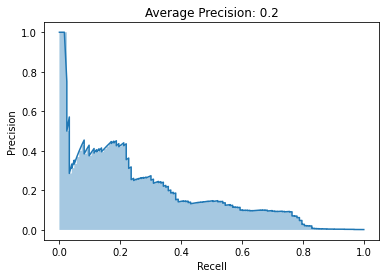

Area Under Curve: 0.19


In [18]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Two-layer Undercomplete AutoEncoder

In [19]:
# Two-layer Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=27, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=20, activation='linear'))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 27)                810       
                                                                 
 dense_7 (Dense)             (None, 20)                560       
                                                                 
 dense_8 (Dense)             (None, 29)                609       
                                                                 
Total params: 1,979
Trainable params: 1,979
Non-trainable params: 0
_________________________________________________________________


In [20]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.3126 - accuracy: 0.5841 - val_loss: 0.2764 - val_accuracy: 0.6116
Epoch 2/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.2789 - accuracy: 0.6167 - val_loss: 0.2747 - val_accuracy: 0.6176
Epoch 3/10
6676/6676 [==============================] - 6s 956us/step - loss: 0.2775 - accuracy: 0.6304 - val_loss: 0.2737 - val_accuracy: 0.6213
Epoch 4/10
6676/6676 [==============================] - 7s 986us/step - loss: 0.2764 - accuracy: 0.6218 - val_loss: 0.2736 - val_accuracy: 0.6352
Epoch 5/10
6676/6676 [==============================] - 6s 962us/step - loss: 0.2761 - accuracy: 0.6455 - val_loss: 0.2728 - val_accuracy: 0.6470
Epoch 6/10
6676/6676 [==============================] - 6s 960us/step - loss: 0.2755 - accuracy: 0.6416 - val_loss: 0.2728 - val_accuracy: 0.6492
Epoch 7/10
6676/6676 [==============================] - 6s 957us/step - loss: 0.2756 - accuracy: 0.6543 - val_loss: 0.2726 - val

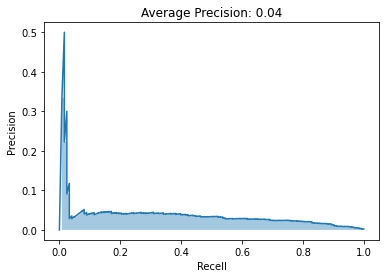

Area Under Curve: 0.04


In [21]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Two-layer Overcomplete AutoEncoder

In [22]:
# Two-layer Overcomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=50, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=40, activation='linear'))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1500      
                                                                 
 dense_10 (Dense)            (None, 40)                2040      
                                                                 
 dense_11 (Dense)            (None, 29)                1189      
                                                                 
Total params: 4,729
Trainable params: 4,729
Non-trainable params: 0
_________________________________________________________________


In [23]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 8s 1ms/step - loss: 0.0341 - accuracy: 0.9465 - val_loss: 0.0030 - val_accuracy: 0.9835
Epoch 2/10
6676/6676 [==============================] - 6s 961us/step - loss: 0.0027 - accuracy: 0.9891 - val_loss: 0.0017 - val_accuracy: 0.9822
Epoch 3/10
6676/6676 [==============================] - 6s 952us/step - loss: 0.0030 - accuracy: 0.9877 - val_loss: 5.3185e-04 - val_accuracy: 0.9949
Epoch 4/10
6676/6676 [==============================] - 6s 951us/step - loss: 0.0021 - accuracy: 0.9870 - val_loss: 0.0052 - val_accuracy: 0.9790
Epoch 5/10
6676/6676 [==============================] - 6s 940us/step - loss: 0.0019 - accuracy: 0.9890 - val_loss: 1.7991e-06 - val_accuracy: 0.9996
Epoch 6/10
6676/6676 [==============================] - 6s 953us/step - loss: 0.0025 - accuracy: 0.9889 - val_loss: 2.7305e-06 - val_accuracy: 0.9995
Epoch 7/10
6676/6676 [==============================] - 6s 961us/step - loss: 0.0017 - accuracy: 0.9888 - val_loss

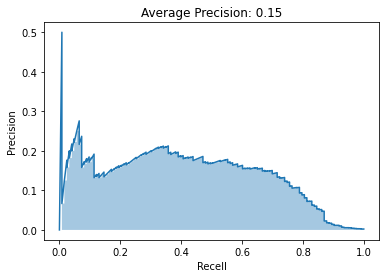

Area Under Curve: 0.14


In [24]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete AutoEncoder with Dropout (0.1)

In [25]:
# Overcomplete AutoEncoder with Dropout(0.1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                1200      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_13 (Dense)            (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [26]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 968us/step - loss: 0.1347 - accuracy: 0.7424 - val_loss: 0.0083 - val_accuracy: 0.9757
Epoch 2/10
6676/6676 [==============================] - 6s 954us/step - loss: 0.0771 - accuracy: 0.7854 - val_loss: 0.0076 - val_accuracy: 0.9733
Epoch 3/10
6676/6676 [==============================] - 6s 951us/step - loss: 0.0780 - accuracy: 0.7868 - val_loss: 0.0074 - val_accuracy: 0.9751
Epoch 4/10
6676/6676 [==============================] - 6s 947us/step - loss: 0.0761 - accuracy: 0.7862 - val_loss: 0.0069 - val_accuracy: 0.9790
Epoch 5/10
6676/6676 [==============================] - 6s 939us/step - loss: 0.0759 - accuracy: 0.7879 - val_loss: 0.0074 - val_accuracy: 0.9767
Epoch 6/10
6676/6676 [==============================] - 6s 937us/step - loss: 0.0764 - accuracy: 0.7866 - val_loss: 0.0106 - val_accuracy: 0.9674
Epoch 7/10
6676/6676 [==============================] - 6s 952us/step - loss: 0.0766 - accuracy: 0.7866 - val_loss: 0.0063 -

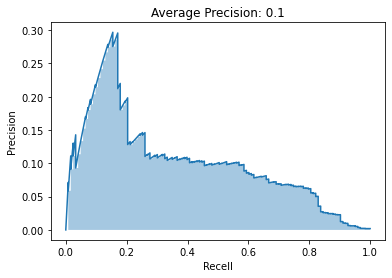

Area Under Curve: 0.1


In [27]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete AutoEncoder with Dropout(0.2)

In [28]:
# Overcomplete AutoEncoder with Dropout(0.2)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 40)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_15 (Dense)            (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [29]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 961us/step - loss: 0.1364 - accuracy: 0.7427 - val_loss: 0.0091 - val_accuracy: 0.9734
Epoch 2/10
6676/6676 [==============================] - 6s 956us/step - loss: 0.0763 - accuracy: 0.7847 - val_loss: 0.0080 - val_accuracy: 0.9731
Epoch 3/10
6676/6676 [==============================] - 6s 946us/step - loss: 0.0763 - accuracy: 0.7862 - val_loss: 0.0087 - val_accuracy: 0.9678
Epoch 4/10
6676/6676 [==============================] - 6s 953us/step - loss: 0.0761 - accuracy: 0.7862 - val_loss: 0.0089 - val_accuracy: 0.9704
Epoch 5/10
6676/6676 [==============================] - 6s 947us/step - loss: 0.0772 - accuracy: 0.7854 - val_loss: 0.0069 - val_accuracy: 0.9802
Epoch 6/10
6676/6676 [==============================] - 6s 954us/step - loss: 0.0771 - accuracy: 0.7837 - val_loss: 0.0072 - val_accuracy: 0.9766
Epoch 7/10
6676/6676 [==============================] - 6s 947us/step - loss: 0.0759 - accuracy: 0.7850 - val_loss: 0.0070 -

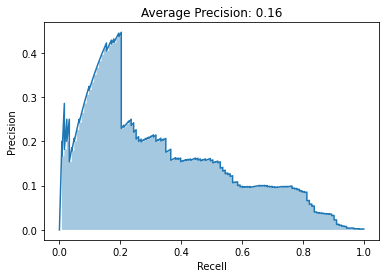

Area Under Curve: 0.16


In [30]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete Sparse (10e-5) AutoEncoder

In [31]:
# Overcomplete Sparse (10e-5) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-5)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 40)                1200      
                                                                 
 dense_17 (Dense)            (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 6s 933us/step - loss: 0.0581 - accuracy: 0.9275 - val_loss: 0.0031 - val_accuracy: 0.9908
Epoch 2/10
6676/6676 [==============================] - 6s 916us/step - loss: 0.0036 - accuracy: 0.9935 - val_loss: 0.0024 - val_accuracy: 0.9978
Epoch 3/10
6676/6676 [==============================] - 6s 925us/step - loss: 0.0029 - accuracy: 0.9920 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 4/10
6676/6676 [==============================] - 6s 919us/step - loss: 0.0026 - accuracy: 0.9930 - val_loss: 0.0018 - val_accuracy: 0.9939
Epoch 5/10
6676/6676 [==============================] - 6s 920us/step - loss: 0.0028 - accuracy: 0.9919 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 6/10
6676/6676 [==============================] - 6s 923us/step - loss: 0.0028 - accuracy: 0.9925 - val_loss: 0.0015 - val_accuracy: 0.9982
Epoch 7/10
6676/6676 [==============================] - 6s 928us/step - loss: 0.0025 - accuracy: 0.9925 - val_loss: 0.0042 -

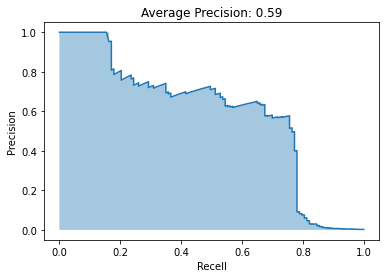

Area Under Curve: 0.59


In [33]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete Sparse (10e-4) AutoEncoder

In [16]:
# Overcomplete Sparse (10e-4) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-4)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                1200      
                                                                 
 dense_5 (Dense)             (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 6s 933us/step - loss: 0.0692 - accuracy: 0.9371 - val_loss: 0.0145 - val_accuracy: 0.9961
Epoch 2/10
6676/6676 [==============================] - 6s 924us/step - loss: 0.0128 - accuracy: 0.9895 - val_loss: 0.0096 - val_accuracy: 0.9924
Epoch 3/10
6676/6676 [==============================] - 6s 931us/step - loss: 0.0103 - accuracy: 0.9879 - val_loss: 0.0082 - val_accuracy: 0.9868
Epoch 4/10
6676/6676 [==============================] - 6s 935us/step - loss: 0.0093 - accuracy: 0.9863 - val_loss: 0.0145 - val_accuracy: 0.9646
Epoch 5/10
6676/6676 [==============================] - 6s 929us/step - loss: 0.0088 - accuracy: 0.9828 - val_loss: 0.0270 - val_accuracy: 0.9169
Epoch 6/10
6676/6676 [==============================] - 6s 938us/step - loss: 0.0084 - accuracy: 0.9851 - val_loss: 0.0055 - val_accuracy: 0.9979
Epoch 7/10
6676/6676 [==============================] - 6s 946us/step - loss: 0.0082 - accuracy: 0.9853 - val_loss: 0.0057 -

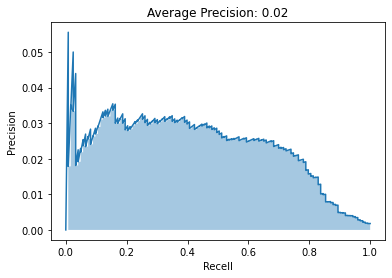

Area Under Curve: 0.02


In [18]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete Sparse (10e-3) AutoEncoder

In [37]:
# Overcomplete Sparse (10e-3) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-3)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 40)                1200      
                                                                 
 dense_21 (Dense)            (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 982us/step - loss: 0.1878 - accuracy: 0.9195 - val_loss: 0.0680 - val_accuracy: 0.9849
Epoch 2/10
6676/6676 [==============================] - 6s 958us/step - loss: 0.0556 - accuracy: 0.9745 - val_loss: 0.0410 - val_accuracy: 0.9882
Epoch 3/10
6676/6676 [==============================] - 6s 953us/step - loss: 0.0432 - accuracy: 0.9715 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 4/10
6676/6676 [==============================] - 6s 952us/step - loss: 0.0390 - accuracy: 0.9718 - val_loss: 0.0285 - val_accuracy: 0.9877
Epoch 5/10
6676/6676 [==============================] - 6s 951us/step - loss: 0.0367 - accuracy: 0.9708 - val_loss: 0.0262 - val_accuracy: 0.9884
Epoch 6/10
6676/6676 [==============================] - 6s 957us/step - loss: 0.0366 - accuracy: 0.9696 - val_loss: 0.0249 - val_accuracy: 0.9887
Epoch 7/10
6676/6676 [==============================] - 6s 954us/step - loss: 0.0388 - accuracy: 0.9685 - val_loss: 0.0252 -

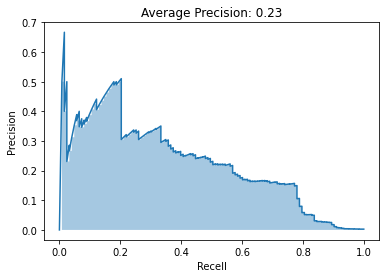

Area Under Curve: 0.23


In [39]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

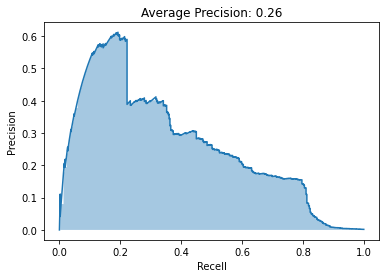

Area Under Curve: 0.26


In [40]:
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Overcomplete Sparse (10e-2) AutoEncoder

In [20]:
# Overcomplete Sparse (10e-2) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-2)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 40)                1200      
                                                                 
 dense_9 (Dense)             (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 6s 932us/step - loss: 0.8063 - accuracy: 0.4167 - val_loss: 0.3833 - val_accuracy: 0.7399
Epoch 2/10
6676/6676 [==============================] - 6s 905us/step - loss: 0.2586 - accuracy: 0.8847 - val_loss: 0.1997 - val_accuracy: 0.9062
Epoch 3/10
6676/6676 [==============================] - 6s 907us/step - loss: 0.1717 - accuracy: 0.9282 - val_loss: 0.1504 - val_accuracy: 0.9285
Epoch 4/10
6676/6676 [==============================] - 6s 913us/step - loss: 0.1582 - accuracy: 0.9268 - val_loss: 0.1192 - val_accuracy: 0.9538
Epoch 5/10
6676/6676 [==============================] - 6s 923us/step - loss: 0.1425 - accuracy: 0.9338 - val_loss: 0.1114 - val_accuracy: 0.9594
Epoch 6/10
6676/6676 [==============================] - 6s 899us/step - loss: 0.1333 - accuracy: 0.9316 - val_loss: 0.1955 - val_accuracy: 0.8485
Epoch 7/10
6676/6676 [==============================] - 6s 900us/step - loss: 0.1365 - accuracy: 0.9344 - val_loss: 0.0975 -

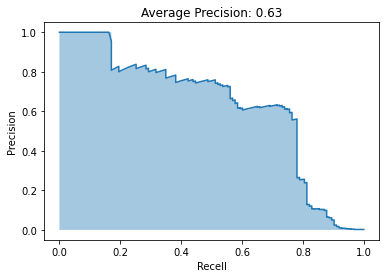

Area Under Curve: 0.63


In [22]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

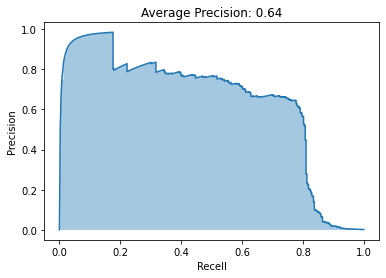

Area Under Curve: 0.64


In [23]:
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Overcomplete Sparse (10e-1) AutoEncoder

In [45]:
# Overcomplete Sparse (10e-1) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-1)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 40)                1200      
                                                                 
 dense_25 (Dense)            (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 961us/step - loss: 1.7089 - accuracy: 0.0454 - val_loss: 1.0667 - val_accuracy: 0.0544
Epoch 2/10
6676/6676 [==============================] - 6s 952us/step - loss: 1.0694 - accuracy: 0.0507 - val_loss: 1.0864 - val_accuracy: 0.0579
Epoch 3/10
6676/6676 [==============================] - 6s 935us/step - loss: 1.0489 - accuracy: 0.0627 - val_loss: 1.0407 - val_accuracy: 0.0939
Epoch 4/10
6676/6676 [==============================] - 6s 944us/step - loss: 1.0118 - accuracy: 0.0931 - val_loss: 1.0024 - val_accuracy: 0.1070
Epoch 5/10
6676/6676 [==============================] - 6s 936us/step - loss: 0.9728 - accuracy: 0.1036 - val_loss: 0.9085 - val_accuracy: 0.1075
Epoch 6/10
6676/6676 [==============================] - 6s 948us/step - loss: 0.9427 - accuracy: 0.1167 - val_loss: 0.8760 - val_accuracy: 0.1315
Epoch 7/10
6676/6676 [==============================] - 6s 932us/step - loss: 0.8996 - accuracy: 0.1416 - val_loss: 0.8810 -

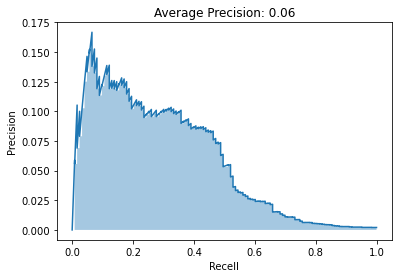

Area Under Curve: 0.06


In [47]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete Sparse (10e-2) AutoEncoder with Dropout (0.1)

In [48]:
# Overcomplete Sparse (10e-2) AutoEncoder with Dropout (0.1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-2)))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 40)                1200      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_27 (Dense)            (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.8073 - accuracy: 0.3632 - val_loss: 0.4047 - val_accuracy: 0.7570
Epoch 2/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.3593 - accuracy: 0.7300 - val_loss: 0.2289 - val_accuracy: 0.9227
Epoch 3/10
6676/6676 [==============================] - 7s 988us/step - loss: 0.2847 - accuracy: 0.7499 - val_loss: 0.1857 - val_accuracy: 0.9363
Epoch 4/10
6676/6676 [==============================] - 7s 996us/step - loss: 0.2581 - accuracy: 0.7539 - val_loss: 0.1900 - val_accuracy: 0.8904
Epoch 5/10
6676/6676 [==============================] - 7s 995us/step - loss: 0.2516 - accuracy: 0.7540 - val_loss: 0.2020 - val_accuracy: 0.9181
Epoch 6/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.2333 - accuracy: 0.7560 - val_loss: 0.1396 - val_accuracy: 0.9477
Epoch 7/10
6676/6676 [==============================] - 7s 986us/step - loss: 0.2343 - accuracy: 0.7531 - val_loss: 0.1305 - val_a

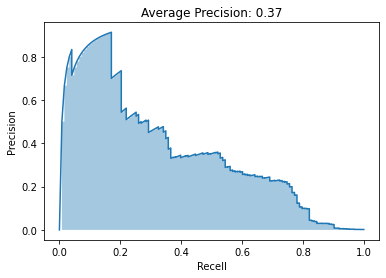

Area Under Curve: 0.37


In [50]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete Sparse (10e-2) AutoEncoder with Dropout (0.1)

In [12]:
# Overcomplete Sparse (10e-2) AutoEncoder with Dropout (0.1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='relu', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                1200      
                                                                 
 dense_3 (Dense)             (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 6s 930us/step - loss: 0.5557 - accuracy: 0.8547 - val_loss: 0.5155 - val_accuracy: 0.9663
Epoch 2/10
6676/6676 [==============================] - 6s 905us/step - loss: 0.5144 - accuracy: 0.9709 - val_loss: 0.5176 - val_accuracy: 0.9476
Epoch 3/10
6676/6676 [==============================] - 6s 956us/step - loss: 0.5141 - accuracy: 0.9743 - val_loss: 0.5145 - val_accuracy: 0.9637
Epoch 4/10
6676/6676 [==============================] - 6s 944us/step - loss: 0.5137 - accuracy: 0.9766 - val_loss: 0.5163 - val_accuracy: 0.9371
Epoch 5/10
6676/6676 [==============================] - 6s 910us/step - loss: 0.5138 - accuracy: 0.9767 - val_loss: 0.5134 - val_accuracy: 0.9823
Epoch 6/10
6676/6676 [==============================] - 6s 914us/step - loss: 0.5136 - accuracy: 0.9783 - val_loss: 0.5129 - val_accuracy: 0.9904
Epoch 7/10
6676/6676 [==============================] - 6s 923us/step - loss: 0.5136 - accuracy: 0.9788 - val_loss: 0.5143 -

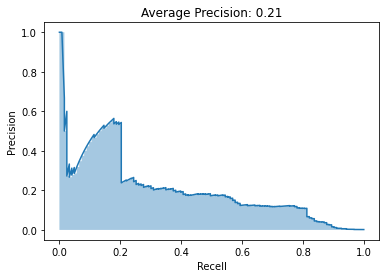

Area Under Curve: 0.21


In [14]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Overcomplete Sparse (10e-2) AutoEncoder with Dropout (0.1) with Relu

In [19]:
# Overcomplete Sparse (10e-2) AutoEncoder with Dropout (0.1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='relu', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-2)))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=29, activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 40)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Sparsity means most of the neurons are inactive
# Hence, it can be used as a regulation
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_AE,
    y=X_train_AE,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_AE, X_train_AE),
    verbose=1)

Epoch 1/10
6676/6676 [==============================] - 8s 993us/step - loss: 0.9483 - accuracy: 0.1715 - val_loss: 0.8296 - val_accuracy: 0.2593
Epoch 2/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.8143 - accuracy: 0.2689 - val_loss: 0.7737 - val_accuracy: 0.3138
Epoch 3/10
6676/6676 [==============================] - 7s 995us/step - loss: 0.7763 - accuracy: 0.3126 - val_loss: 0.7405 - val_accuracy: 0.3847
Epoch 4/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.7435 - accuracy: 0.3938 - val_loss: 0.7039 - val_accuracy: 0.4553
Epoch 5/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.7246 - accuracy: 0.4262 - val_loss: 0.6937 - val_accuracy: 0.4665
Epoch 6/10
6676/6676 [==============================] - 7s 1ms/step - loss: 0.7155 - accuracy: 0.4412 - val_loss: 0.6849 - val_accuracy: 0.4928
Epoch 7/10
6676/6676 [==============================] - 7s 979us/step - loss: 0.7077 - accuracy: 0.4589 - val_loss: 0.6872 - val_acc

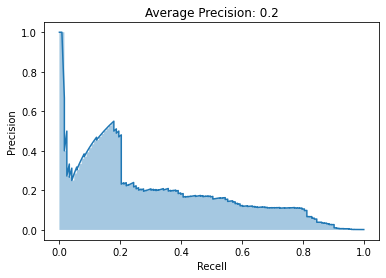

Area Under Curve: 0.2


In [11]:
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

#### Overcomplete Sparse (10e-2) AutoEncoder is the best model so far.